In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_target = pd.read_csv('data/cleaned_target.csv')

df_target

,subject,target_location,delay,trial,End_Center_X,End_Center_Y,Target_Center_X,Target_Center_Y,Initial_X,Initial_Y,Total_Time
0,sub1,cornerBottomLeft,0,0,32.092860,825.250000,43.789287,802.232179,731.714295,457.714295,1045
1,sub1,midTopRight,50,1,1069.196574,234.229197,1063.991131,231.809536,731.714295,457.714295,782
2,sub1,midTopLeft,250,2,420.898865,235.372065,394.104188,231.809536,731.714295,457.714295,882
3,sub1,midBottomLeft,100,3,390.613159,602.532776,394.104188,602.095277,731.714295,457.714295,680
4,sub1,midTopRight,200,4,1076.053630,226.800624,1063.991131,231.809536,731.714295,457.714295,957
...,...,...,...,...,...,...,...,...,...,...,...
475,sub6,cornerBottomLeft,50,75,35.521428,808.107239,43.789287,802.232179,731.714295,457.714295,1060
476,sub6,cornerTopRight,150,76,1415.221690,38.369048,1413.810802,31.672621,731.714295,457.714295,1316
477,sub6,midTopRight,100,77,1071.482218,230.229197,1063.991131,231.809536,731.714295,457.714295,918
478,sub6,cornerTopLeft,250,78,45.035721,34.940478,44.160716,31.672621,731.714295,457.714295,2513


In [2]:
# if the 'target_location' is starts with 'corner', then the column 'group' is 'corner'
# if the 'target_location' is starts with 'mid', then the column 'group' is 'mid'

df_target['group'] = np.where(df_target['target_location'].str.startswith('corner'), 'corner', 'mid')

df_target


,subject,target_location,delay,trial,End_Center_X,End_Center_Y,Target_Center_X,Target_Center_Y,Initial_X,Initial_Y,Total_Time,group
0,sub1,cornerBottomLeft,0,0,32.092860,825.250000,43.789287,802.232179,731.714295,457.714295,1045,corner
1,sub1,midTopRight,50,1,1069.196574,234.229197,1063.991131,231.809536,731.714295,457.714295,782,mid
2,sub1,midTopLeft,250,2,420.898865,235.372065,394.104188,231.809536,731.714295,457.714295,882,mid
3,sub1,midBottomLeft,100,3,390.613159,602.532776,394.104188,602.095277,731.714295,457.714295,680,mid
4,sub1,midTopRight,200,4,1076.053630,226.800624,1063.991131,231.809536,731.714295,457.714295,957,mid
...,...,...,...,...,...,...,...,...,...,...,...,...
475,sub6,cornerBottomLeft,50,75,35.521428,808.107239,43.789287,802.232179,731.714295,457.714295,1060,corner
476,sub6,cornerTopRight,150,76,1415.221690,38.369048,1413.810802,31.672621,731.714295,457.714295,1316,corner
477,sub6,midTopRight,100,77,1071.482218,230.229197,1063.991131,231.809536,731.714295,457.714295,918,mid
478,sub6,cornerTopLeft,250,78,45.035721,34.940478,44.160716,31.672621,731.714295,457.714295,2513,corner


In [3]:
# calculate the 'accuracy' and precision for each row
import numpy as np

# Define a function to calculate Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Calculate accuracy (distance between End_Center and Target_Center)
df_target['Accuracy'] = euclidean_distance(
    df_target['End_Center_X'], df_target['End_Center_Y'],
    df_target['Target_Center_X'], df_target['Target_Center_Y']
)

# Calculate precision for each target location
# Group by 'target_location' and calculate the mean and standard deviation of End_Center positions
grouped = df_target.groupby('target_location')[['End_Center_X', 'End_Center_Y']]
precision = grouped.std().rename(columns=lambda col: f"Precision_{col.split('_')[-1]}")

# Merge precision metrics back into the original dataframe
data_with_precision = df_target.merge(precision, on='target_location', how='left')

data_with_precision.head()

,subject,target_location,delay,trial,End_Center_X,End_Center_Y,Target_Center_X,Target_Center_Y,Initial_X,Initial_Y,Total_Time,group,Accuracy,Precision_X,Precision_Y
0,sub1,cornerBottomLeft,0,0,32.092860,825.250000,43.789287,802.232179,731.714295,457.714295,1045,corner,25.819111,8.969984,9.344682
1,sub1,midTopRight,50,1,1069.196574,234.229197,1063.991131,231.809536,731.714295,457.714295,782,mid,5.740331,36.075941,31.140293
2,sub1,midTopLeft,250,2,420.898865,235.372065,394.104188,231.809536,731.714295,457.714295,882,mid,27.030470,43.726257,22.566429
3,sub1,midBottomLeft,100,3,390.613159,602.532776,394.104188,602.095277,731.714295,457.714295,680,mid,3.518336,7.733434,6.267513
4,sub1,midTopRight,200,4,1076.053630,226.800624,1063.991131,231.809536,731.714295,457.714295,957,mid,13.061129,36.075941,31.140293


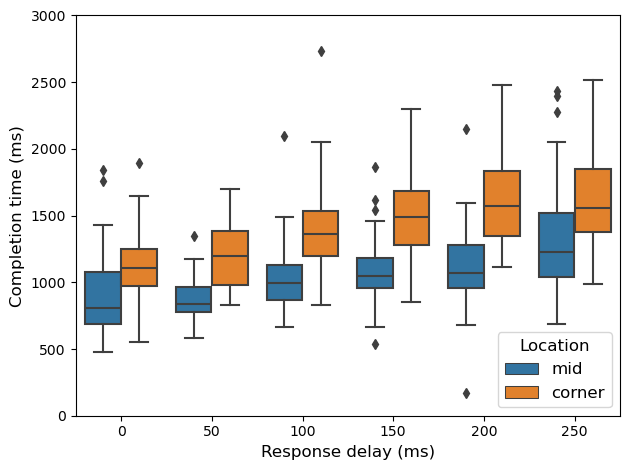

In [29]:
# group by 'subject' and 'delay' and 'group' for accuracy
# grouped = data_with_precision.groupby(['subject', 'delay', 'group'])['Total_Time'].mean().reset_index()


sns.boxplot(x='delay', y='Total_Time', data=df_target, hue='group', hue_order=['mid', 'corner'])
# sns.violinplot(x='delay', y='Total_Time', data=df_target, hue='group', hue_order=['mid', 'corner'], split=True)
plt.legend(title='Location', title_fontsize='12', fontsize='12', loc='lower right')
plt.xlabel('Response delay (ms)', fontsize=12)
plt.ylabel('Completion time (ms)', fontsize=12)
plt.ylim(0, 3000)

# tight_layout() adjusts the plot to the size of the figure
plt.tight_layout()

plt.savefig('dragging_completion.pdf')

In [16]:
grouped

,subject,delay,group,Accuracy
0,sub1,0,corner,12.970587
1,sub1,0,mid,5.417663
2,sub1,50,corner,7.484841
3,sub1,50,mid,5.247672
4,sub1,100,corner,8.204315
...,...,...,...,...
67,sub6,150,mid,13.114533
68,sub6,200,corner,17.484979
69,sub6,200,mid,14.066400
70,sub6,250,corner,19.354910


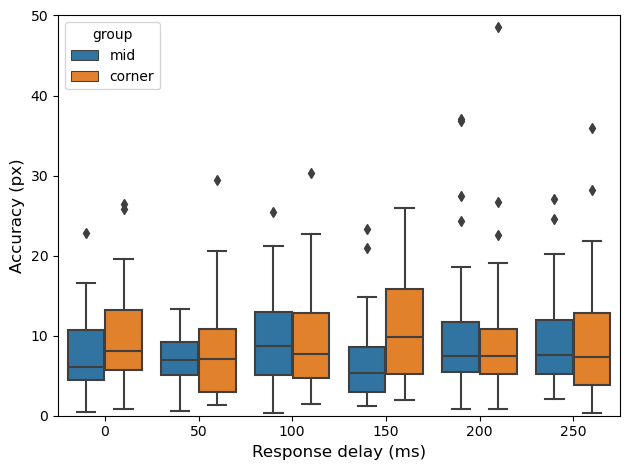

In [29]:
sns.boxplot(x='delay', y='Accuracy', data=df_target, hue='group', hue_order=['mid', 'corner'])
plt.xlabel('Response delay (ms)', fontsize=12)
plt.ylabel('Accuracy (px)', fontsize=12)
plt.ylim(0, 50)

# tight_layout() adjusts the plot to the size of the figure
plt.tight_layout()

plt.savefig('completion time.pdf')

In [11]:
%%script false --no-raise-error

# Step 1: Calculate mean Target Center for each target_location
target_means = df_target.groupby('target_location').agg({
    'Target_Center_X': 'mean',
    'Target_Center_Y': 'mean'
}).rename(columns={
    'Target_Center_X': 'Corrected_Target_Center_X',
    'Target_Center_Y': 'Corrected_Target_Center_Y'
})

# Step 2: Merge the corrected Target Center back into the dataset
data_corrected = df_target.merge(target_means, on='target_location', how='left')

# Step 3: Calculate the offset for Target Center correction
data_corrected['Offset_X'] = data_corrected['Corrected_Target_Center_X'] - data_corrected['Target_Center_X']
data_corrected['Offset_Y'] = data_corrected['Corrected_Target_Center_Y'] - data_corrected['Target_Center_Y']

# Step 4: Apply the offsets to End Center to compensate for Target Center movement
data_corrected['Corrected_End_Center_X'] = data_corrected['End_Center_X'] + data_corrected['Offset_X']
data_corrected['Corrected_End_Center_Y'] = data_corrected['End_Center_Y'] + data_corrected['Offset_Y']

# Drop helper columns for cleaner output
data_corrected_final = data_corrected.drop(columns=['Offset_X', 'Offset_Y'])

In [65]:
%%script false --no-raise-error

# Correctly renaming and dropping old columns to clean up the dataset
data_cleaned = data_corrected_final.drop(columns=[
    'Target_Center_X', 'Target_Center_Y', 'End_Center_X', 'End_Center_Y'
]).rename(columns={
    'Corrected_Target_Center_X': 'Target_Center_X',
    'Corrected_Target_Center_Y': 'Target_Center_Y',
    'Corrected_End_Center_X': 'End_Center_X',
    'Corrected_End_Center_Y': 'End_Center_Y'
})

# Reorganize columns for clarity
data_cleaned = data_cleaned[
    ['subject', 'target_location', 'delay', 'trial', 'End_Center_X', 'End_Center_Y', 'Target_Center_X', 'Target_Center_Y', 'Initial_X', 'Initial_Y', 'Total_Time']
]

data_cleaned.head()

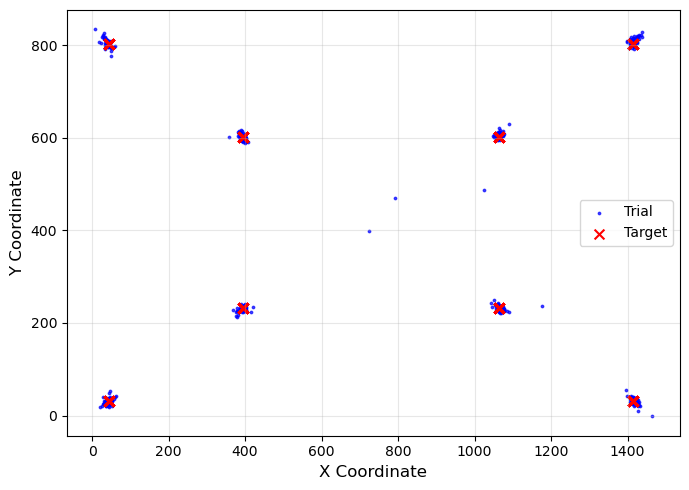

In [33]:
# Scatter plot to visualize the distribution of all End_Center points
plt.figure(figsize=(7, 5))

# Plot each End_Center point
plt.scatter(df_target['End_Center_X'], df_target['End_Center_Y'], alpha=0.7, label='End Centers', color='blue', s=3)

# Highlight the Target Centers for reference
plt.scatter(df_target['Target_Center_X'], df_target['Target_Center_Y'], color='red', label='Target Centers', marker='x', s=50)

# Add labels, title, and legend
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
# plt.title('Distribution of End_Center Points')
plt.legend(['Trial', 'Target'])
plt.grid(alpha=0.3)

# Adjust axes for better visualization
plt.tight_layout()
plt.savefig('distribution.pdf')
plt.show()


In [14]:
# Step 1: Calculate the mean (x, y) position for each group
mean_positions = df_target.groupby(['subject', 'delay', 'group']).agg({
    'End_Center_X': 'mean',
    'End_Center_Y': 'mean'
}).rename(columns={
    'End_Center_X': 'Mean_End_Center_X',
    'End_Center_Y': 'Mean_End_Center_Y'
}).reset_index()

# Merge the mean positions back into the original dataset
data_with_means = df_target.merge(mean_positions, on=['subject', 'delay', 'group'], how='left')

# Step 2: Calculate the Euclidean distance from each point to the group's mean position
data_with_means['Distance_To_Mean'] = np.sqrt(
    (data_with_means['End_Center_X'] - data_with_means['Mean_End_Center_X'])**2 +
    (data_with_means['End_Center_Y'] - data_with_means['Mean_End_Center_Y'])**2
)

# Step 3: Calculate the standard deviation of distances (Precision) for each group
distance_precision = data_with_means.groupby(['subject', 'delay', 'group']).agg({
    'Distance_To_Mean': 'std'
}).rename(columns={'Distance_To_Mean': 'Distance_Precision'}).reset_index()

# Convert the distance-based precision data to wide format
wide_format_distance_precision = distance_precision.pivot(index='subject', columns=['delay', 'group'], values='Distance_Precision')

# Flatten the multi-level column index
wide_format_distance_precision.columns = [f"{delay}_{group}" for delay, group in wide_format_distance_precision.columns]
wide_format_distance_precision.reset_index(inplace=True)

# Save the result as a CSV file
wide_format_distance_precision.to_csv('distance_precision_wide_format.csv', index=False)